# Demo of the LAMINAR package

In [1]:
import LAMINAR

import torch
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

In [2]:
# make moon dataset

X, _ = make_moons(n_samples=500, noise=0.1)
X = (X - X.mean(axis=0)) / X.std(axis=0)

# make a tensor
data = torch.tensor(X, dtype=torch.float32)
data.shape

torch.Size([500, 2])

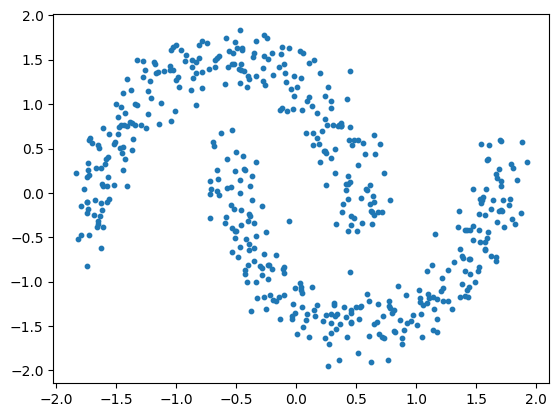

In [3]:
# visualize the dataset

plt.scatter(X[:, 0], X[:, 1], s=10);

In [4]:
# initialize the LAM class

hyperparameters = {
    'hidden_dim': 32,
    'width': 64,
    'timesteps': 50,
    'learning_rate': 5e-3,
    'patience': 50,
    'sig': 3,
    'batch_size': 256,
}

LAM = LAMINAR.LAMINAR(data, epochs=100, k_neighbours=25, grid_resolution=30, hyperparameters=hyperparameters)

LAM.p_value()

Epoch 100 | Loss: 1.8601: 100%|██████████| 100/100 [00:25<00:00,  3.86it/s]


Henze-Zirkler p-value:	0.3921496200907195


0.3921496200907195

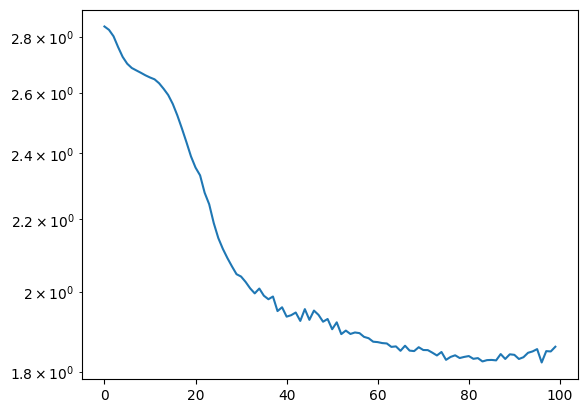

In [5]:
plt.plot(LAM.loss_history)
plt.yscale('log')

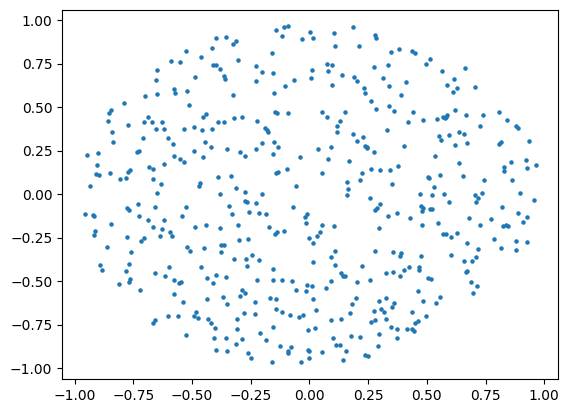

In [6]:
# visualize the pushed data
plt.scatter(LAM.data_pushed[:, 0], LAM.data_pushed[:, 1], s=5);

In [7]:
# default nearest neighbours of point with index 0
LAM.query(0)

([array([  0, 250, 482,  19, 302, 318, 147, 288,  29, 310, 152, 260, 421,
           8,  87,  27, 300, 431, 396, 466, 332,  94, 181, 370, 290],
        dtype=int64)],
 [array([0.     , 0.00839, 0.07419, 0.12258, 0.12494, 0.1285 , 0.13253,
         0.13904, 0.14673, 0.15623, 0.15982, 0.16549, 0.17957, 0.18486,
         0.18543, 0.18602, 0.22412, 0.22943, 0.23994, 0.2416 , 0.24444,
         0.24611, 0.24959, 0.26753, 0.27231])])

In [8]:
# query the 5 nearest neighbours of the points [0, 2, 5]
LAM.query(np.array([0, 2, 5]) , k_neighbours=5)

([array([  0, 250, 482,  19, 302], dtype=int64),
  array([  2, 358,  71, 354, 475], dtype=int64),
  array([  5, 127,  67,  48, 292], dtype=int64)],
 [array([0.     , 0.00839, 0.07419, 0.12258, 0.12494]),
  array([0.     , 0.01752, 0.02899, 0.03648, 0.05154]),
  array([0.     , 0.04439, 0.04784, 0.05111, 0.06367])])

In [9]:
# calculate the distance between the points 0 and p
p = 5
dist = LAM.distance(X[0], X[p], return_path=False)
print(dist)

[0.49474]


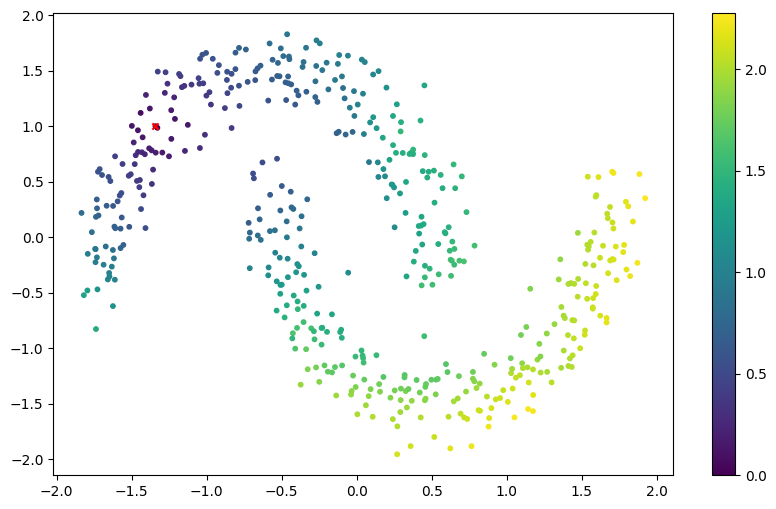

In [10]:
# calculate the distance to all points from the point 0 and plot

start_point = X[0].reshape(1, -1) 

dist = LAM.distance(start_point)

fig, ax = plt.subplots(figsize=(10, 6))

plot = ax.scatter(X[:, 0], X[:, 1], c=dist, cmap='viridis', s=10, vmin=0, vmax=dist.max())
ax.scatter(X[0, 0], X[0, 1], c='r', s=20, marker='x')
plt.colorbar(plot)
plt.show()

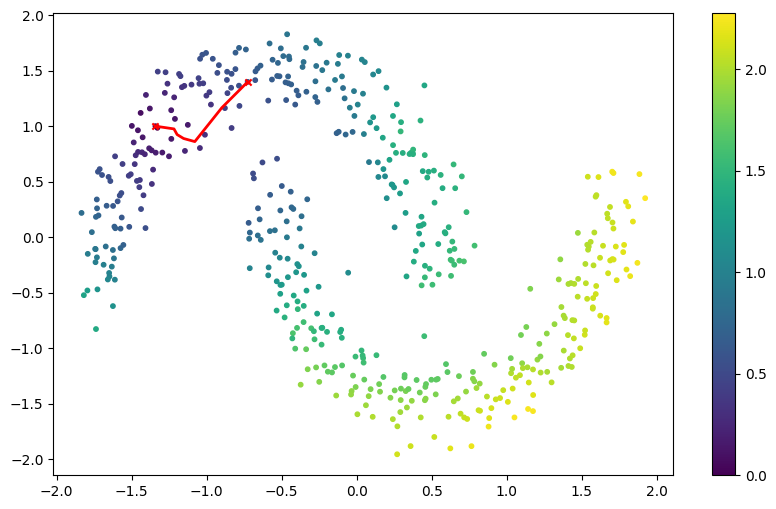

In [11]:
start_point = X[0].reshape(1, -1) 
end_point = X[p].reshape(1, -1)

d, path = LAM.distance(start_point, end_point, return_path=True)
fig, ax = plt.subplots(figsize=(10, 6))
plot = ax.scatter(X[:, 0], X[:, 1], c=dist, cmap='viridis', s=10, vmin=0, vmax=dist.max())
# plot the path, consider that the entries in path are points
ax.plot(path[:, 0], path[:, 1], c='r', linewidth=2)
ax.scatter(X[0, 0], X[0, 1], c='r', s=20, marker='x')
ax.scatter(X[p, 0], X[p, 1], c='r', s=20, marker='x')
plt.colorbar(plot)
plt.show()

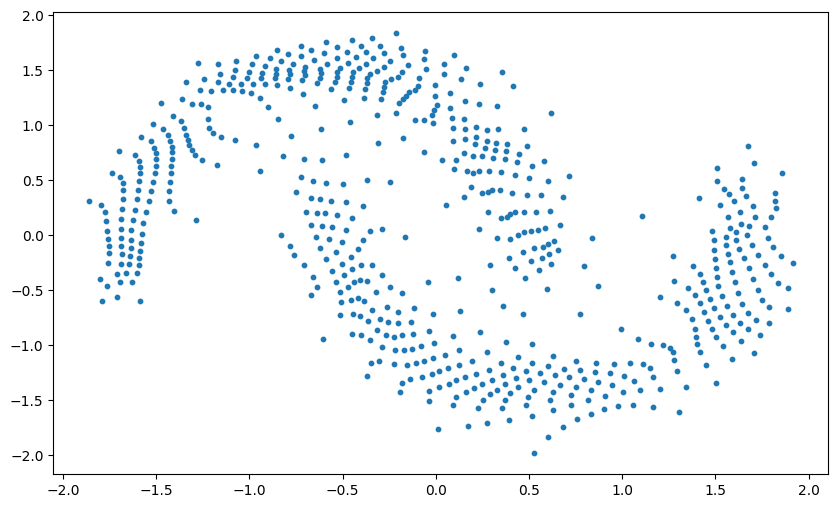

In [12]:
grid = LAM.grid 

#plot the grid
fig, ax = plt.subplots(figsize=(10, 6))
plot = ax.scatter(grid[:, 0], grid[:, 1], s=10)
plt.show()
